# Time series forecasting

# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("classic")

## Import time series data: Airline passenger traffic

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/airline-passenger-traffic.csv', header = None)
data.head()

0      1
0  1949-01  112.0
1  1949-02  118.0
2  1949-03  132.0
3  1949-04  129.0
4  1949-05  121.0

In [3]:
data.columns = ['Month','Passengers']
data.head()

Month  Passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0

In [4]:
data.tail()

Month  Passengers
139  1960-08       606.0
140  1960-09       508.0
141  1960-10       461.0
142  1960-11       390.0
143  1960-12       432.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [7]:
data.head()

Month  Passengers
0 1949-01-01       112.0
1 1949-02-01       118.0
2 1949-03-01       132.0
3 1949-04-01       129.0
4 1949-05-01       121.0

In [8]:
data = data.set_index('Month')

data.head(12)

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0
1949-06-01       135.0
1949-07-01       148.0
1949-08-01       148.0
1949-09-01       136.0
1949-10-01       119.0
1949-11-01       104.0
1949-12-01       118.0

In [9]:
data.columns

Index(['Passengers'], dtype='object')

# Time series analysis

## Plot time series data

In [10]:
plt.style.use("classic")

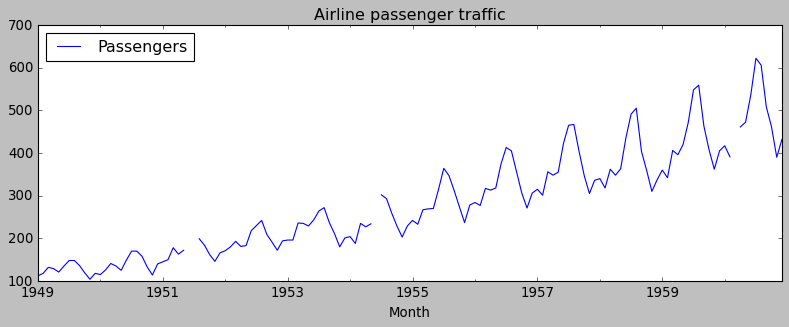

In [11]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

In [12]:
data.isna().sum()

Passengers    4
dtype: int64

## Missing value treatment

### Mean imputation

In [13]:
data.Passengers.mean()

280.73571428571427

In [14]:
data.head(3)

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0

In [15]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data.head()

Passengers  Passengers_Mean_Imputation
Month                                             
1949-01-01       112.0                       112.0
1949-02-01       118.0                       118.0
1949-03-01       132.0                       132.0
1949-04-01       129.0                       129.0
1949-05-01       121.0                       121.0

In [16]:
data.isna().sum()

Passengers                    4
Passengers_Mean_Imputation    0
dtype: int64

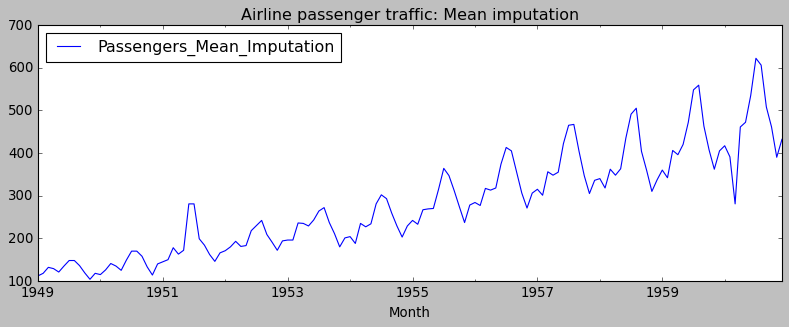

In [17]:
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### ffill imputation

In [18]:
data = data.assign(Passengers_ffill_Imputation=data.Passengers.fillna(method="ffill"))
data.head()

Passengers  Passengers_Mean_Imputation  \
Month                                                
1949-01-01       112.0                       112.0   
1949-02-01       118.0                       118.0   
1949-03-01       132.0                       132.0   
1949-04-01       129.0                       129.0   
1949-05-01       121.0                       121.0   

            Passengers_ffill_Imputation  
Month                                    
1949-01-01                        112.0  
1949-02-01                        118.0  
1949-03-01                        132.0  
1949-04-01                        129.0  
1949-05-01                        121.0

In [19]:
data.isnull().sum()

Passengers                     4
Passengers_Mean_Imputation     0
Passengers_ffill_Imputation    0
dtype: int64

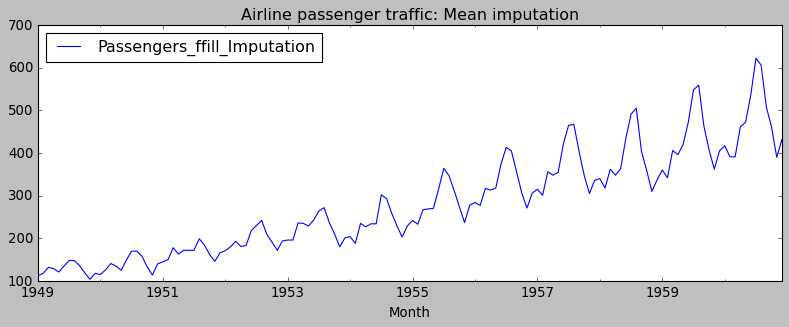

In [20]:
data[['Passengers_ffill_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### bfill imputation

In [21]:
data = data.assign(Passengers_bfill_Imputation=data.Passengers.fillna(method="bfill"))
data.head()

Passengers  Passengers_Mean_Imputation  \
Month                                                
1949-01-01       112.0                       112.0   
1949-02-01       118.0                       118.0   
1949-03-01       132.0                       132.0   
1949-04-01       129.0                       129.0   
1949-05-01       121.0                       121.0   

            Passengers_ffill_Imputation  Passengers_bfill_Imputation  
Month                                                                 
1949-01-01                        112.0                        112.0  
1949-02-01                        118.0                        118.0  
1949-03-01                        132.0                        132.0  
1949-04-01                        129.0                        129.0  
1949-05-01                        121.0                        121.0

In [22]:
data.isnull().sum()

Passengers                     4
Passengers_Mean_Imputation     0
Passengers_ffill_Imputation    0
Passengers_bfill_Imputation    0
dtype: int64

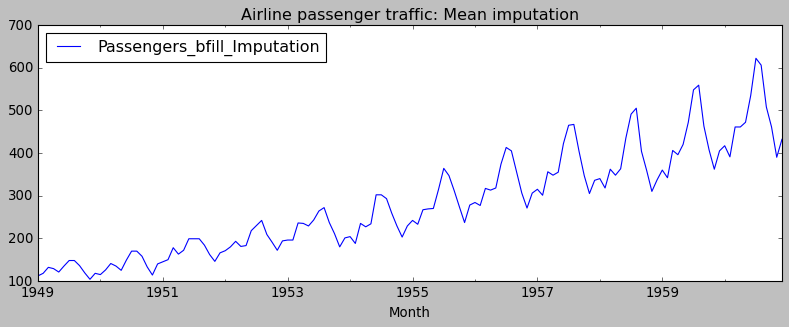

In [23]:
data[['Passengers_bfill_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

In [24]:
data = data.assign(
    Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data.head()

Passengers  Passengers_Mean_Imputation  \
Month                                                
1949-01-01       112.0                       112.0   
1949-02-01       118.0                       118.0   
1949-03-01       132.0                       132.0   
1949-04-01       129.0                       129.0   
1949-05-01       121.0                       121.0   

            Passengers_ffill_Imputation  Passengers_bfill_Imputation  \
Month                                                                  
1949-01-01                        112.0                        112.0   
1949-02-01                        118.0                        118.0   
1949-03-01                        132.0                        132.0   
1949-04-01                        129.0                        129.0   
1949-05-01                        121.0                        121.0   

            Passengers_Linear_Interpolation  
Month                                        
1949-01-01                            112.0  
1949-02-01                            118.0  
1949-03-01                            132.0  
1949-04-01                            129.0  
1949-05-01                            121.0

In [25]:
data.isna().sum()

Passengers                         4
Passengers_Mean_Imputation         0
Passengers_ffill_Imputation        0
Passengers_bfill_Imputation        0
Passengers_Linear_Interpolation    0
dtype: int64

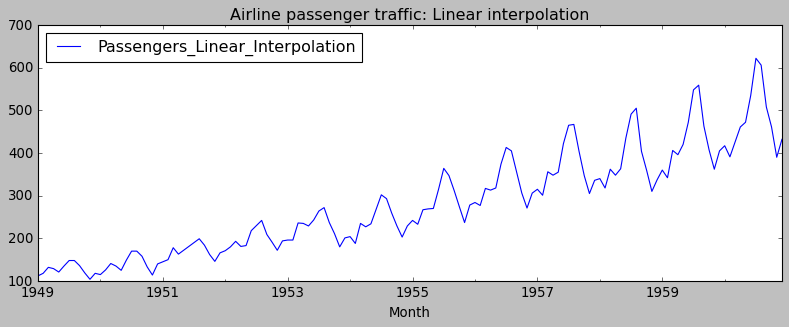

In [26]:
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [27]:
data.head()

Passengers  Passengers_Mean_Imputation  \
Month                                                
1949-01-01       112.0                       112.0   
1949-02-01       118.0                       118.0   
1949-03-01       132.0                       132.0   
1949-04-01       129.0                       129.0   
1949-05-01       121.0                       121.0   

            Passengers_ffill_Imputation  Passengers_bfill_Imputation  \
Month                                                                  
1949-01-01                        112.0                        112.0   
1949-02-01                        118.0                        118.0   
1949-03-01                        132.0                        132.0   
1949-04-01                        129.0                        129.0   
1949-05-01                        121.0                        121.0   

            Passengers_Linear_Interpolation  
Month                                        
1949-01-01                            112.0  
1949-02-01                            118.0  
1949-03-01                            132.0  
1949-04-01                            129.0  
1949-05-01                            121.0

In [28]:
data.columns

Index(['Passengers', 'Passengers_Mean_Imputation',
       'Passengers_ffill_Imputation', 'Passengers_bfill_Imputation',
       'Passengers_Linear_Interpolation'],
      dtype='object')

In [29]:
data.drop(['Passengers', 'Passengers_Mean_Imputation',
       'Passengers_ffill_Imputation', 'Passengers_bfill_Imputation'], axis=1, inplace=True)
data.columns

Index(['Passengers_Linear_Interpolation'], dtype='object')

In [30]:
data.columns = ['Passengers']
data.head()

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0

In [31]:
data.isna().sum()

Passengers    0
dtype: int64

## Outlier detection

### Box plot and interquartile range

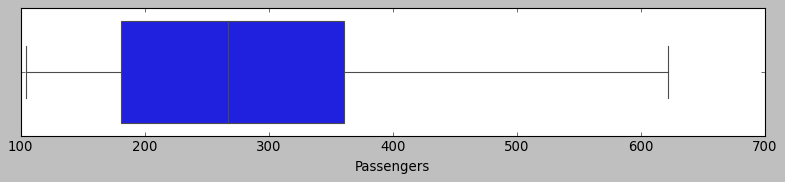

In [32]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5);

### Histogram plot

In [33]:
# plt.style.use('dark_background')
plt.style.use("classic")

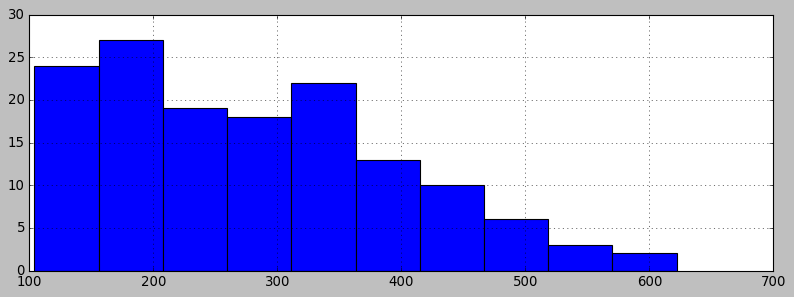

In [34]:
fig = data.Passengers.hist(figsize = (12,4));

## Time series Decomposition

### Additive seasonal decomposition

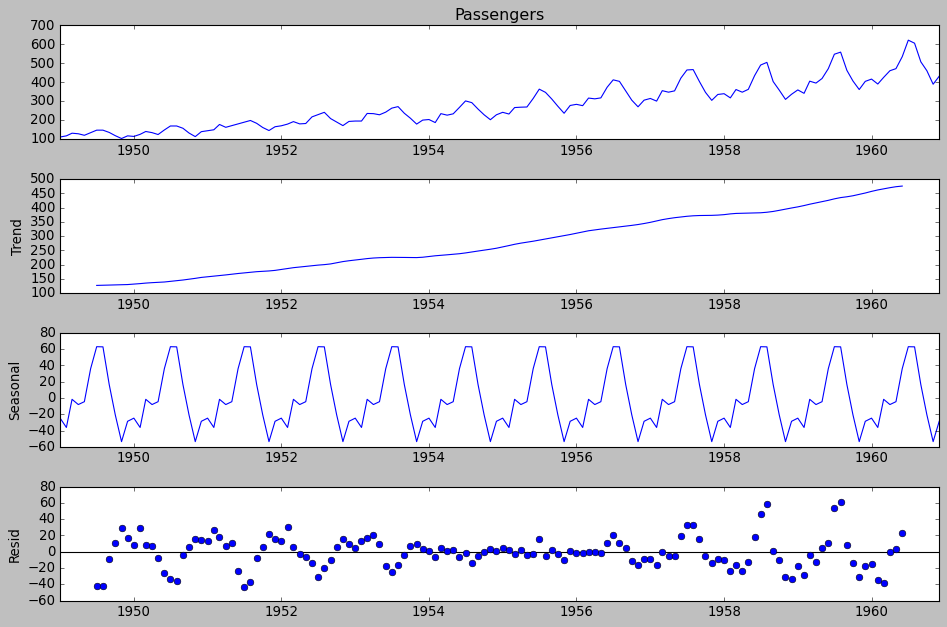

In [35]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, 
                                          model='additive') 
                                        # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

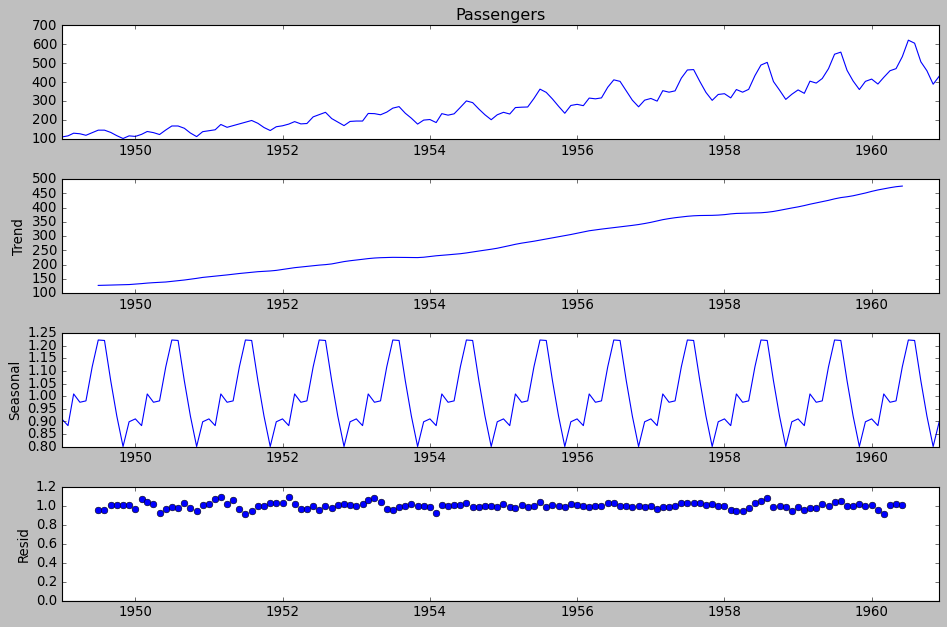

In [36]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, 
                                          model='multiplicative') 
                                        # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [37]:
data.shape # Jan 1949 to Dec 1960 i.e. 12 years i.e. 144 months

(144, 1)

In [38]:
144//12

12

In [39]:
data.head()

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0

# Build and evaluate time series forecast

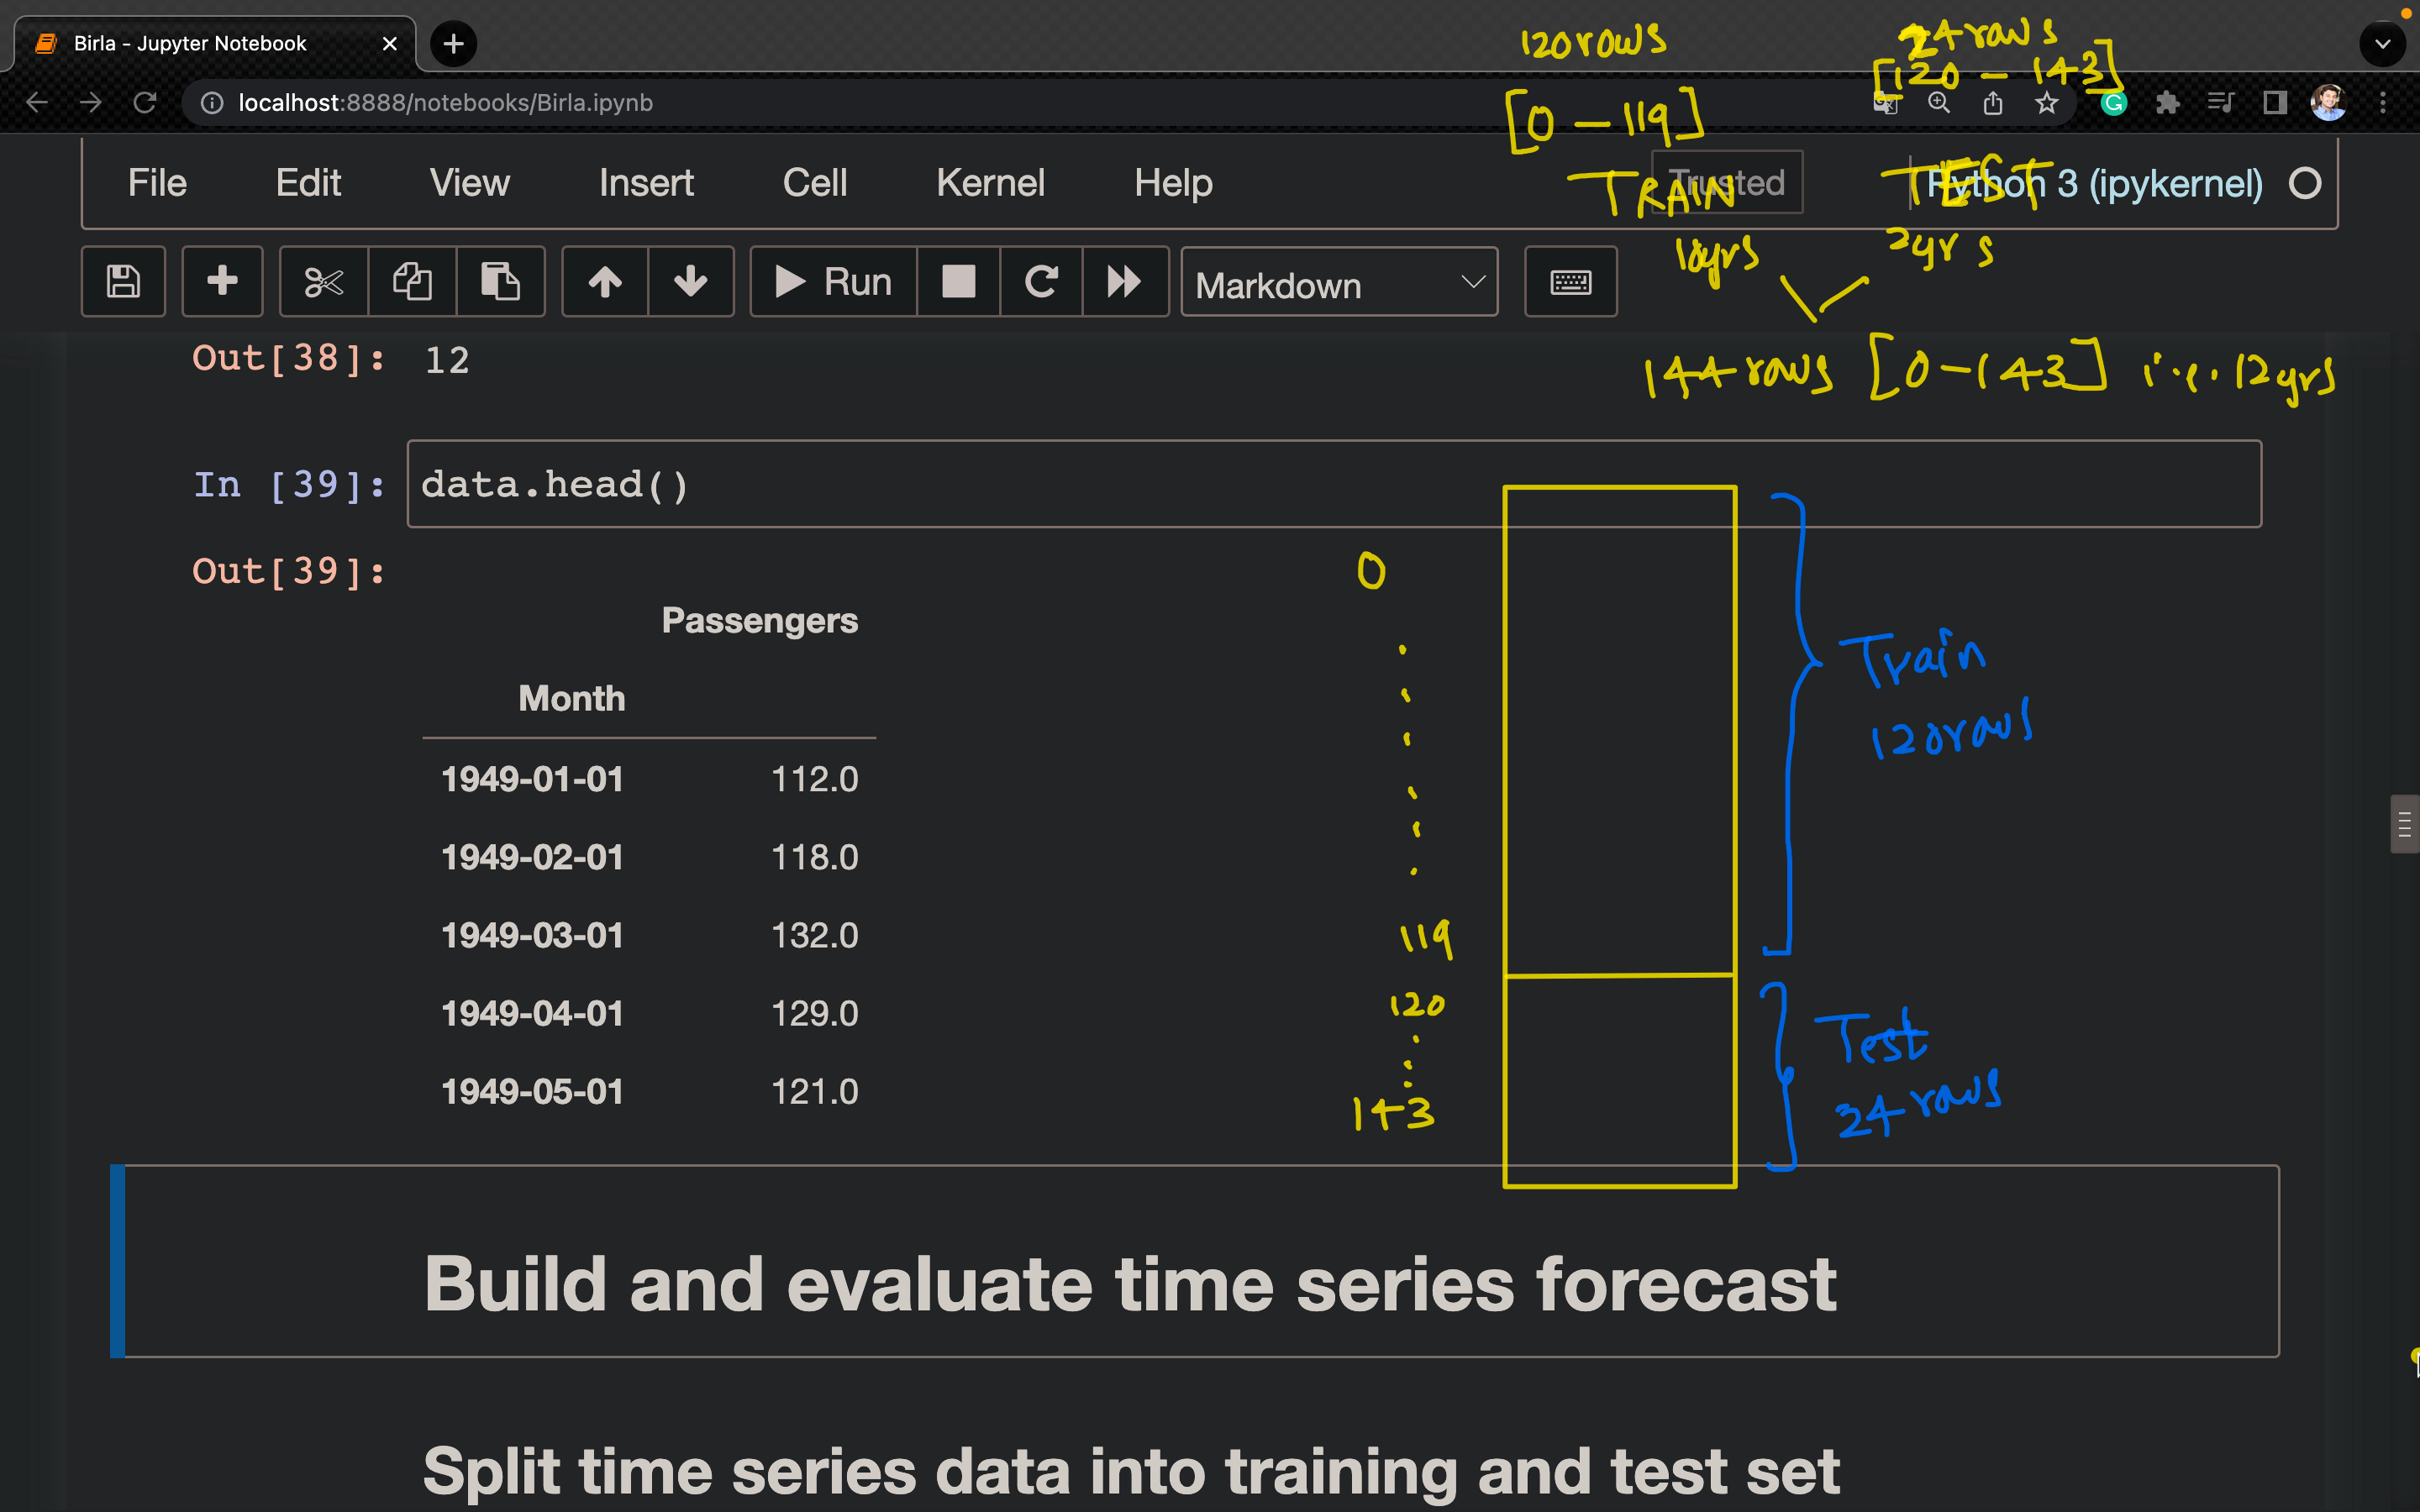

## Split time series data into training and test set

In [40]:
train_len = 120
train = data[0:train_len] # first 120 months as training set, i.e. 0 to 119
test = data[train_len:] # last 24 months as out-of-time test set i.e. 120 to end

In [41]:
train.shape

(120, 1)

In [42]:
test.shape

(24, 1)

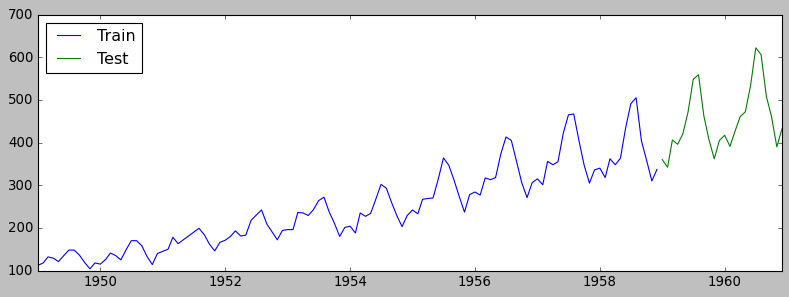

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.legend(loc='best')
plt.show()

# Simple time series methods

## Naive method

In [47]:
train_len-1

119

In [48]:
train.head()

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0

In [49]:
train.iloc[119]

Passengers    337.0
Name: 1958-12-01 00:00:00, dtype: float64

In [50]:
train['Passengers'][train_len-1]

337.0

In [51]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

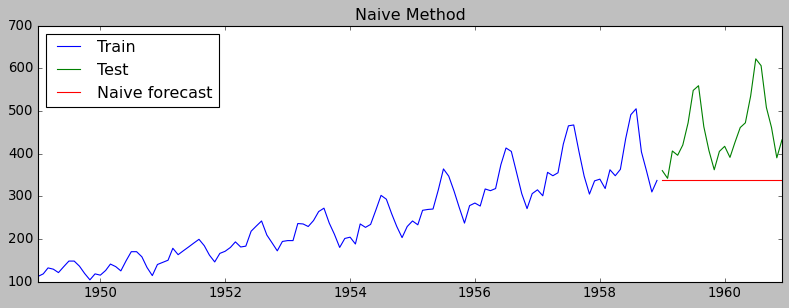

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [54]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(
    test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(
    test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100, 2)

results = pd.DataFrame(
    {'Method': ['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0  Naive method  137.51  23.63

## Simple average method

In [55]:
train['Passengers'].mean()

245.89166666666668

In [56]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

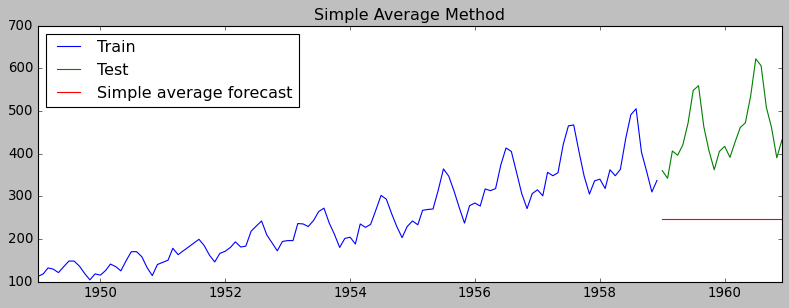

In [57]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [58]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0           Naive method  137.51  23.63
0  Simple average method  219.69  44.28

## Simple moving average method

In [59]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

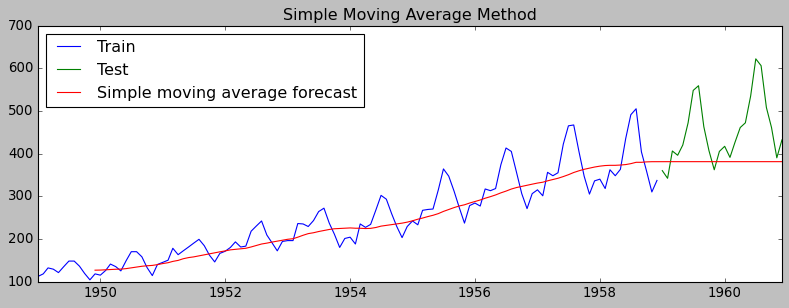

In [60]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [61]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                    Naive method  137.51  23.63
0           Simple average method  219.69  44.28
0  Simple moving average forecast  103.33  15.54

# Exponential smoothing methods

## Simple exponential smoothing

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Plot train, test and forecast

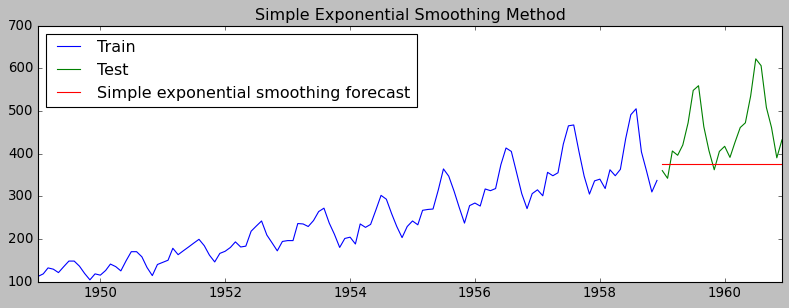

In [63]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [64]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  103.33  15.54
0  Simple exponential smoothing forecast  107.65  16.49

In [65]:
data.tail()

Passengers
Month                 
1960-08-01       606.0
1960-09-01       508.0
1960-10-01       461.0
1960-11-01       390.0
1960-12-01       432.0

## Holt's method with trend

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.0606060606060694, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

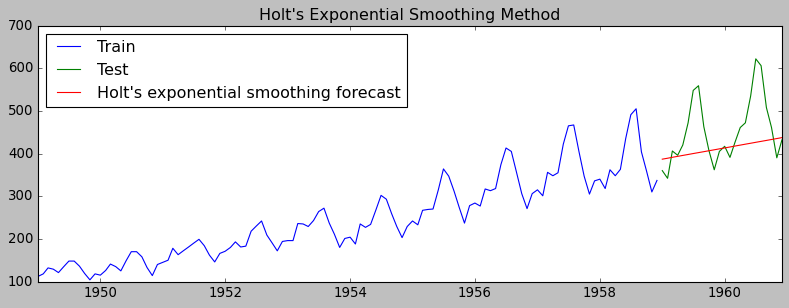

In [67]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [68]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  103.33  15.54
0  Simple exponential smoothing forecast  107.65  16.49
0    Holt's exponential smoothing method   80.91  11.39

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='multiplicative', seasonal=None)
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.02, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.3, 'smoothing_trend': 0.02, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 1.01739397349977, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

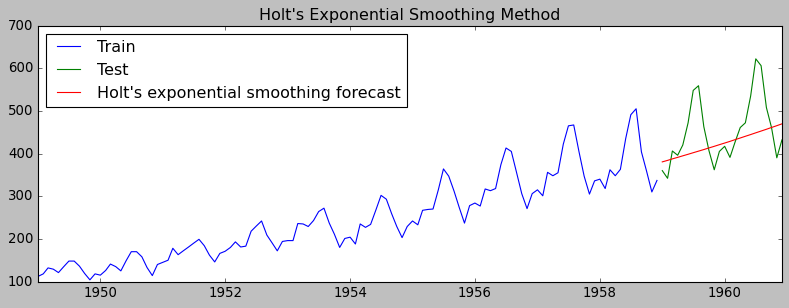

In [70]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                                       Naive method  137.51  23.63
0                              Simple average method  219.69  44.28
0                     Simple moving average forecast  103.33  15.54
0              Simple exponential smoothing forecast  107.65  16.49
0                Holt's exponential smoothing method   80.91  11.39
0  Holt's exponential smoothing method Multiplica...   74.77  11.03

## Holt Winters' additive method with trend and seasonality

In [72]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']),
                             seasonal_periods=12,
                             trend='add',
                             seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361048811067686, 'smoothing_trend': 1.495848568537338e-08, 'smoothing_seasonal': 0.7638950484300636, 'damping_trend': nan, 'initial_level': 119.14218148541963, 'initial_trend': 2.2767100560816718, 'initial_seasons': array([ -9.40021132,  -3.88635605,   8.61225823,   3.52724975,
        -5.16799835,   8.97924341,  21.25104417,  19.33009502,
         5.2465649 , -13.59826775, -28.28046151, -12.13884517]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

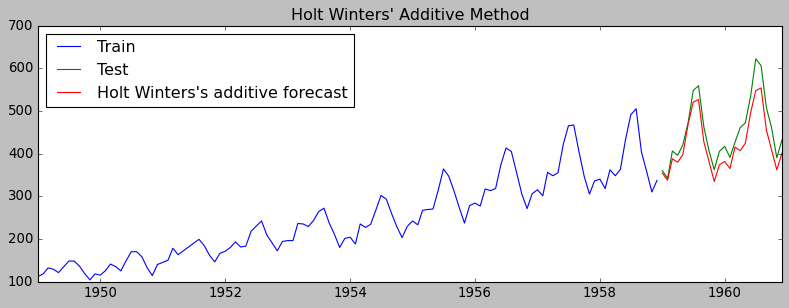

In [73]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [74]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                                       Naive method  137.51  23.63
0                              Simple average method  219.69  44.28
0                     Simple moving average forecast  103.33  15.54
0              Simple exponential smoothing forecast  107.65  16.49
0                Holt's exponential smoothing method   80.91  11.39
0  Holt's exponential smoothing method Multiplica...   74.77  11.03
0                      Holt Winters' additive method   35.87   6.72

## Holt Winter's multiplicative method with trend and seasonality

In [75]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']),
                             seasonal_periods=12,
                             trend='add',
                             seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.36559851565510476, 'smoothing_trend': 6.093534404040174e-11, 'smoothing_seasonal': 0.6344014843285365, 'damping_trend': nan, 'initial_level': 98.38625130100081, 'initial_trend': 2.1308957817332397, 'initial_seasons': array([1.11422822, 1.17201629, 1.28824141, 1.22469579, 1.1303995 ,
       1.23616125, 1.3442532 , 1.33513035, 1.21793044, 1.06133496,
       0.94355992, 1.08858587]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

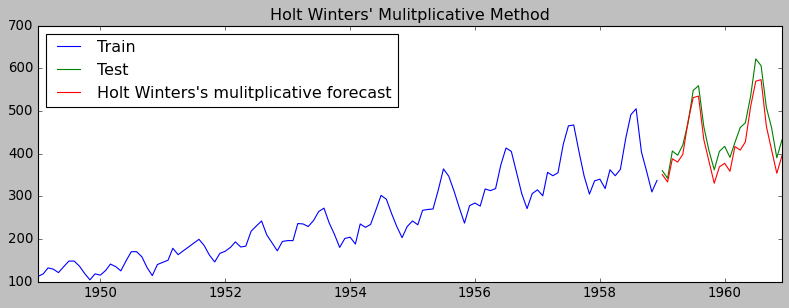

In [76]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [77]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                                       Naive method  137.51  23.63
0                              Simple average method  219.69  44.28
0                     Simple moving average forecast  103.33  15.54
0              Simple exponential smoothing forecast  107.65  16.49
0                Holt's exponential smoothing method   80.91  11.39
0  Holt's exponential smoothing method Multiplica...   74.77  11.03
0                      Holt Winters' additive method   35.87   6.72
0                Holt Winters' multiplicative method   32.45   6.45

## More on Time Series Forecasting for Self Exploration

>https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

>https://www.kaggle.com/code/gauravduttakiit/time-series-forecasting-with-autoregressive-method/notebook

>https://www.kaggle.com/code/lokeshkumarn/autoregression-model/notebook

>https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series

>https://github.com/kirenz/time-series-analysis/blob/master/time-series-first-steps.ipynb

>https://github.com/tristanga/Machine-Learning/blob/master/Time%20Series%20Forecasting/Autoregression%20(AR).ipynb

>https://github.com/tanaymukherjee/Time-Series-Modeling

>https://github.com/vishnukanduri/Time-series-analysis-in-Python

>https://www.kaggle.com/code/timmate/autoregressive-model

# Happy Learning